# Predict half-life of drugs based on structural properties

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

Read in half-life and structural info of drugs, check summary statistics

In [2]:
# read in half-life and other structural info of drugs
data_df = pd.read_excel('data/drugbank_halflife_curated.xlsx')

In [3]:
# Extract value from water solubility (e.g. '5.12e-04 g/l')
data_df['cal_water_solubility'] = data_df.cal_water_solubility.str.replace(' g/l','').astype(float)

In [4]:
# Drugs with half-life info
half_life_id = ~data_df['half_life_hours_curated'].isna()
half_life_df = data_df[half_life_id]
half_life_id.sum()

1023

In [5]:
# Drugs with half-life and other structural info
len(half_life_df) - half_life_df.isna().sum(axis=0)

type                         1023
drugbank_id                  1023
name                         1023
cal_logp                      907
cal_logs                      889
cal_water_solubility          889
cal_molecular_weight          907
cal_polar_surface_area        905
cal_refractivity              905
cal_polarizability            903
cal_rotatable_bond_count      905
cal_h_bond_acceptor_count     905
cal_h_bond_donor_count        905
cal_pka_acidic                726
cal_pka_basic                 876
cal_physiological_charge      906
cal_number_of_rings           906
cal_bioavailability           906
cal_rule_of_five              709
exp_molecular_weight           78
exp_logp                      731
exp_pka                       168
half_life                    1023
half_life_hours_curated      1023
dtype: int64

First, build a random forest model predicting half-life based on logP, water solubility, and molecular weight. 
Previous studies have suggested that these three properties are most informative of half-life.

In [6]:
# Extract LogP, solubility, and MW for half life prediction
half_life_len = len(half_life_df)
query_col_names = ['cal_logp','cal_water_solubility','cal_molecular_weight','half_life_hours_curated']
row_id = half_life_df.loc[:,query_col_names].isna().sum(axis=1) == 0
complete_data_df = half_life_df.loc[row_id,query_col_names]
# number of samples for training
len(complete_data_df)

889

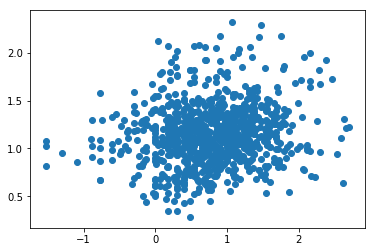

In [7]:
# Build random forest model
y = complete_data_df.loc[:,'half_life_hours_curated']
X = complete_data_df.iloc[:, :-1]
regr = RandomForestRegressor(random_state=0, n_estimators=1000, oob_score = True)
regr.fit(X, y)
# plot actual half-life vs out-of-bag prediction
plt.scatter(np.log10(y), np.log10(regr.oob_prediction_))
plt.show()

Next, build a random forest model predicting half-life based on all structural properties extracted from DrugBank.

In [8]:
# Extract all calculated structural properties for half life prediction
half_life_len = len(half_life_df)
query_col_names = ['cal_logp','cal_logs',
                   'cal_water_solubility','cal_molecular_weight','cal_polar_surface_area',
                   'cal_refractivity','cal_polarizability','cal_rotatable_bond_count',
                   'cal_h_bond_acceptor_count','cal_h_bond_donor_count','cal_pka_acidic',
                  'cal_pka_basic','cal_physiological_charge','cal_number_of_rings',
                  'cal_bioavailability','half_life_hours_curated']
row_id = half_life_df.loc[:,query_col_names].isna().sum(axis=1) == 0
complete_data_df = half_life_df.loc[row_id,query_col_names]
# number of samples for training
len(complete_data_df)

687

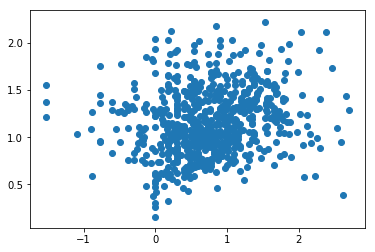

In [9]:
# Build random forest model
y = complete_data_df.loc[:,'half_life_hours_curated']
X = complete_data_df.iloc[:, :-1]
regr = RandomForestRegressor(random_state=0, n_estimators=1000, oob_score = True)
regr.fit(X, y)
# plot actual half-life vs out-of-bag prediction
plt.scatter(np.log10(y), np.log10(regr.oob_prediction_))
plt.show()

Both models have poor performance according to two plots.